# New York Taxi Trip Predicition

The data was originally published by the NYC Taxi and Limousine Commission (TLC).

File description

train.csv - the training set (contains 1458644 trip records)
test.csv - the testing set (contains 625134 trip records)


Data fields

id - a unique identifier for each trip.         
vendor_id - a code indicating the provider associated with the trip record.    
pickup_datetime - date and time when the meter was engaged.    
dropoff_datetime - date and time when the meter was disengaged.     
passenger_count - the number of passengers in the vehicle (driver entered value).      
pickup_longitude - the longitude where the meter was engaged.      
pickup_latitude - the latitude where the meter was engaged      
dropoff_longitude - the longitude where the meter was disengaged      
dropoff_latitude - the latitude where the meter was disengaged      
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip        
trip_duration - duration of the trip in seconds     


IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

IMPORT DATA FILES

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


Creating a function to convert the lattitude and longitude of pickup and drop off locations into distance.

In [4]:
def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    miles = km *  0.621371
    return miles

In [5]:
df_train['distance'] = haversine(df_train.pickup_longitude, df_train.pickup_latitude,
                                           df_train.dropoff_longitude, df_train.dropoff_latitude)

In [6]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.930553
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.121185
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.965024
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.922466
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.738091


Plotting the pickup lattitudes and longitudes

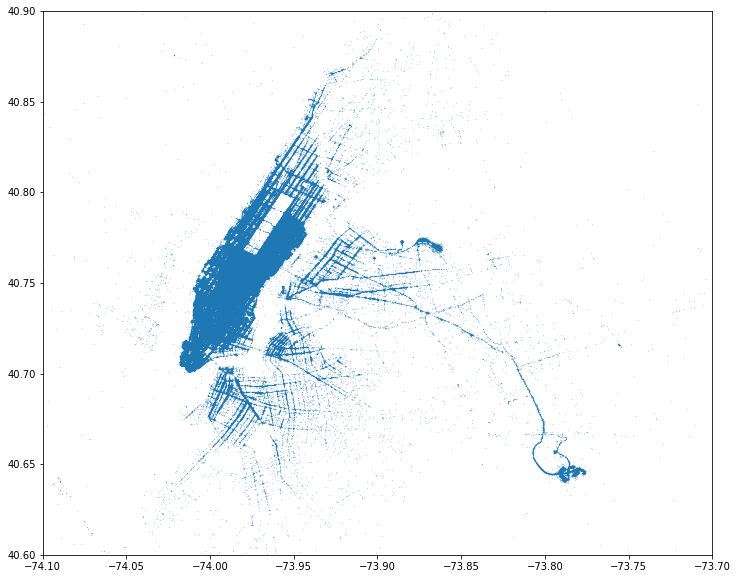

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)
ax.scatter(df_train['pickup_longitude'],df_train['pickup_latitude'], s=0.01, alpha=1)

In [8]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [9]:
df_test['distance'] = haversine(df_test.pickup_longitude, df_test.pickup_latitude,
                                           df_test.dropoff_longitude, df_test.dropoff_latitude)

Converting the Categorial columns to Numeric

In [10]:
flag=pd.get_dummies(df_train['store_and_fwd_flag'],drop_first=True)

In [11]:
df_train=pd.concat([df_train,flag],axis=1)

In [12]:
df_train.drop(['store_and_fwd_flag'] , axis=1,inplace =True)

In [13]:
flagtest=pd.get_dummies(df_test['store_and_fwd_flag'],drop_first=True)

In [14]:
df_test=pd.concat([df_test,flagtest],axis=1)

In [15]:
df_test.drop(['store_and_fwd_flag'] , axis=1,inplace =True)

In [16]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'] )

In [17]:
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])

In [18]:
df_train['pickup_hour'] = df_train.pickup_datetime.dt.hour
df_train['day'] = df_train.pickup_datetime.dt.dayofyear
df_train['weekday'] = df_train.pickup_datetime.dt.dayofweek
df_train['month'] = df_train.pickup_datetime.dt.month

In [19]:
df_train['date']=pd.to_datetime(df_train.pickup_datetime.dt.date,format='%Y-%m-%d')

In [20]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,Y,pickup_hour,day,weekday,month,date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0.930553,0,17,74,0,3,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.121185,0,0,164,6,6,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,3.965024,0,11,19,1,1,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0.922466,0,19,97,2,4,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0.738091,0,13,86,5,3,2016-03-26


In [21]:
df_train['date'] = pd.to_datetime(df_train['date'], format = "%Y-%m-%d")

In [22]:
type(df_train['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
df_train['id']=df_train['id'].str[2:]

In [24]:
df_test['id']=df_test['id'].str[2:]

In [25]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,Y,pickup_hour,day,weekday,month,date
0,2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0.930553,0,17,74,0,3,2016-03-14
1,2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.121185,0,0,164,6,6,2016-06-12
2,3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,3.965024,0,11,19,1,1,2016-01-19
3,3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0.922466,0,19,97,2,4,2016-04-06
4,2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0.738091,0,13,86,5,3,2016-03-26


In [26]:
df_test['pickup_hour'] = df_test.pickup_datetime.dt.hour
df_test['day'] = df_test.pickup_datetime.dt.dayofyear
df_test['weekday'] = df_test.pickup_datetime.dt.dayofweek
df_test['month'] = df_test.pickup_datetime.dt.month

In [27]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Y,pickup_hour,day,weekday,month
0,3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1.705478,0,23,182,3,6
1,3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1.713435,0,23,182,3,6
2,1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0.811098,0,23,182,3,6
3,2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,3.272003,0,23,182,3,6
4,1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0.596664,0,23,182,3,6


In [28]:
X_train=df_train.drop (['trip_duration','dropoff_datetime','pickup_datetime','date'] , axis=1)
y_train=df_train['trip_duration']
X_test=df_test.drop(['pickup_datetime'],axis=1)


LINEAR REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
predict_linear=lm.predict(X_test)

In [33]:
predict_linear

array([ 858.85291205,  995.98193974,  722.5817951 , ..., 1293.67147155,
       2617.59742511, 1279.39252334])

In [37]:
test=pd.read_csv('test.csv')

In [38]:
test['trip_duration']=predict_linear.astype(int)

output= test[['id','trip_duration']]

In [39]:
output.isnull().values.any()

False

In [40]:
#output.to_csv('prediction_linearRegression',index=False)

In [41]:
output.head()

,id,trip_duration
0,id3004672,858
1,id3505355,995
2,id1217141,722
3,id2150126,1311
4,id1598245,640
